In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('dark_background')

In [2]:
tickers = ['ITUB4.SA', 'RENT3.SA', 'B3SA3.SA', 'ABEV3.SA', 'JBSS3.SA', 'SUZB3.SA', 'NTCO3.SA', 'LREN3.SA', 'GGBR4.SA', 'HAPV3.SA', 'RAIL3.SA', 'EGIE3.SA', 'BRKM5.SA', 'MRFG3.SA', 'BRML3.SA']
dados = yf.download(tickers,start='2021-01-01')['Adj Close'][tickers]
log_returns = np.log(dados/dados.shift()).iloc[1:-1]

[*********************100%***********************]  15 of 15 completed


In [9]:
user_weight = None
long_only = False
n_tickers = len(tickers)
meta = 15

In [10]:
#Recomendado não utilizar n > 20.000.000
t0 = datetime.now()
n = 20000000

weights = np.random.rand(n, n_tickers)
if not long_only:
    weights = weights*2 - 1
if user_weight:
    weights[0] = np.array(user_weight)
weights /= weights.sum(axis=1, keepdims=1)

exp_rtns = np.sum(np.array(log_returns.mean()).T*weights, axis=1)*252
exp_vols = np.sqrt((weights * np.dot(weights, np.array(log_returns.cov())*252)).sum(-1))
sharpe_ratios = exp_rtns / exp_vols

print('Tempo Total de Simulação:', datetime.now()-t0)
print(weights)

Tempo Total de Simulação: 0:01:02.533813
[[-3.24803137e+01  5.29691753e+00 -2.01684627e+01 ... -3.28349971e+01
   4.11618127e+01 -4.43238991e+01]
 [-1.61357720e-01  6.65219504e-01  3.28628071e-01 ... -1.17961191e+00
   9.03758849e-02  8.23855501e-01]
 [-2.48942188e-01 -8.94527125e-02 -4.22117055e-01 ...  9.36725109e-02
   3.12645282e-01  5.92396367e-02]
 ...
 [ 1.42284060e-01  2.20918310e-01  8.56029473e-02 ... -2.27604376e-01
   1.28684117e-01  7.78009468e-02]
 [ 1.58919009e-01 -1.26528255e-01  1.58555356e-01 ... -6.26604232e-02
   1.95105678e-01  2.29036101e-01]
 [ 1.18931161e-01  5.55618065e-02  9.72831878e-03 ...  5.58697832e-02
   1.06142702e-01  1.80756098e-01]]


In [17]:
# # Não utiizar com n > 100.000
# t0 = datetime.now()
# n = 100000

# weights = np.zeros((n, 5))
# exp_rtns = np.zeros(n)
# exp_vols = np.zeros(n)
# sharpe_ratios = np.zeros(n)

# for i in range(n):
#     if i == 0:
#         weight = np.array(user_weight)
#     else:
#         weight = np.random.random(5)
        
#     weight = weight / weight.sum()
#     weights[i] = weight
    
#     exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
#     exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
#     sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]
# print('Tempo Total de Simulação:', datetime.now()-t0)

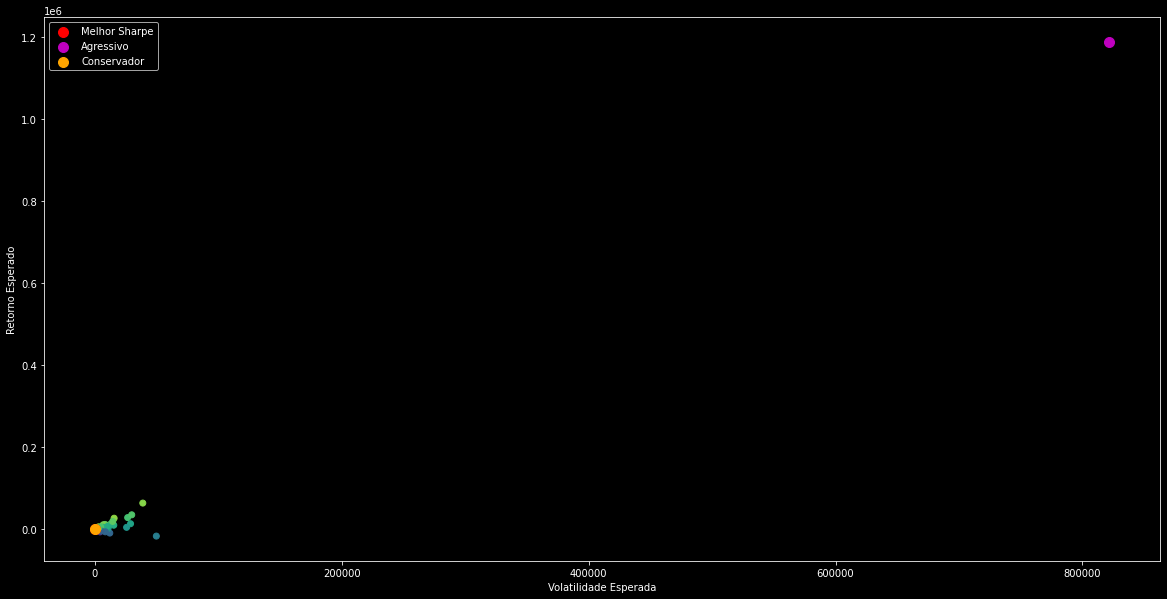

In [11]:
# Usar sample para n > 1.000.000
sample_size = 500000
sample = np.random.choice(np.arange(0, n), size=sample_size, replace=False) if sample_size else np.arange(0, n)

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(exp_vols[sample], exp_rtns[sample], c=sharpe_ratios[sample])
if user_weight:
    ax.scatter(exp_vols[0], exp_rtns[0], c='white', s=100, label='Seu Portfolio')
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r', s=100, label='Melhor Sharpe')
ax.scatter(exp_vols[exp_rtns.argmax()], exp_rtns[exp_rtns.argmax()], c='m', s=100, label='Agressivo')
ax.scatter(exp_vols[exp_vols.argmin()], exp_rtns[exp_vols.argmin()], c='orange', s=100, label='Conservador')
ax.legend()
ax.set_xlabel('Volatilidade Esperada')
ax.set_ylabel('Retorno Esperado')
plt.show()

In [12]:
# Usuário
n_u = 0
if user_weight:
        print('Seu Portfolio:\nPesos:')
        for p, w in zip(tickers, weights[n_u]):
                print(f'{p}: {w:.0%}')
        print('Sharpe:', sharpe_ratios[n_u])
        print('Retorno:', exp_rtns[n_u])
        print('Volatilidade:', exp_vols[n_u])
        print('\n')

# Melhor sharpe
n_e = sharpe_ratios.argmax()
print('Melhor Sharpe:\nPesos:')
for p, w in zip(tickers, weights[n_e]):
        print(f'{p}: {w:.0%}')
print('Sharpe:', sharpe_ratios[n_e])
print('Retorno:', exp_rtns[n_e])
print('Volatilidade:', exp_vols[n_e])
print('\n')

# Agressivo
n_a = exp_rtns.argmax()
print('Perfil Agressivo:\nPesos:')
for p, w in zip(tickers, weights[n_a]):
        print(f'{p}: {w:.0%}')
print('Sharpe:', sharpe_ratios[n_a])
print('Retorno:', exp_rtns[n_a])
print('Volatilidade:', exp_vols[n_a])
print('\n')

# Conservador
n_c = exp_vols.argmin()
print('Perfil Conservador:\nPesos:')
for p, w in zip(tickers, weights[n_c]):
        print(f'{p}: {w:.0%}')
print('Sharpe:', sharpe_ratios[n_c])
print('Retorno:', exp_rtns[n_c])
print('Volatilidade:', exp_vols[n_c])

params = (
        ('Seu Portfólio', weights[n_u], exp_rtns[n_u], exp_vols[n_u]),
        ('Melhor Sharpe', weights[n_e], exp_rtns[n_e], exp_vols[n_e]),
        ('Agressivo', weights[n_a], exp_rtns[n_a], exp_vols[n_a]),
        ('Conservador', weights[n_c], exp_rtns[n_c], exp_vols[n_c]))
        
if not user_weight:
        params = params[1:]

Melhor Sharpe:
Pesos:
ITUB4.SA: -115%
RENT3.SA: 43%
B3SA3.SA: 11%
ABEV3.SA: -50%
JBSS3.SA: 167%
SUZB3.SA: -148%
NTCO3.SA: -212%
LREN3.SA: -61%
GGBR4.SA: 92%
HAPV3.SA: -34%
RAIL3.SA: -11%
EGIE3.SA: 107%
BRKM5.SA: 139%
MRFG3.SA: 101%
BRML3.SA: 71%
Sharpe: 2.5917828217145584
Retorno: 3.9536815407255266
Volatilidade: 1.525467916370409


Perfil Agressivo:
Pesos:
ITUB4.SA: 47693297%
RENT3.SA: -66550011%
B3SA3.SA: -22203568%
ABEV3.SA: -82747726%
JBSS3.SA: 68942043%
SUZB3.SA: -2291271%
NTCO3.SA: -23959097%
LREN3.SA: -23940818%
GGBR4.SA: -88830470%
HAPV3.SA: 75026312%
RAIL3.SA: -61156982%
EGIE3.SA: 15545620%
BRKM5.SA: 91475827%
MRFG3.SA: 83237426%
BRML3.SA: -10240482%
Sharpe: 1.4452055276444224
Retorno: 1187900.3348739026
Volatilidade: 821959.4460104867


Perfil Conservador:
Pesos:
ITUB4.SA: 11%
RENT3.SA: -8%
B3SA3.SA: 1%
ABEV3.SA: 14%
JBSS3.SA: 11%
SUZB3.SA: 20%
NTCO3.SA: 0%
LREN3.SA: -3%
GGBR4.SA: 15%
HAPV3.SA: 11%
RAIL3.SA: -2%
EGIE3.SA: 21%
BRKM5.SA: -6%
MRFG3.SA: 11%
BRML3.SA: 3%
Sharpe: 0

Melhor Sharpe
ITUB4.SA: -115%
RENT3.SA: 43%
B3SA3.SA: 11%
ABEV3.SA: -50%
JBSS3.SA: 167%
SUZB3.SA: -148%
NTCO3.SA: -212%
LREN3.SA: -61%
GGBR4.SA: 92%
HAPV3.SA: -34%
RAIL3.SA: -11%
EGIE3.SA: 107%
BRKM5.SA: 139%
MRFG3.SA: 101%
BRML3.SA: 71%
Drift: 3.9536815407255266
Volatility: 1.525467916370409
DescribeResult(nobs=100, minmax=(-0.6722533744414927, 953.2714709450154), mean=52.989639570932596, variance=15993.016965702764, skewness=5.017030384754233, kurtosis=28.677927701320744)
Probabilidade de ter lucro: 94.00%
Probabilidade de atingir 15%: 51.00%


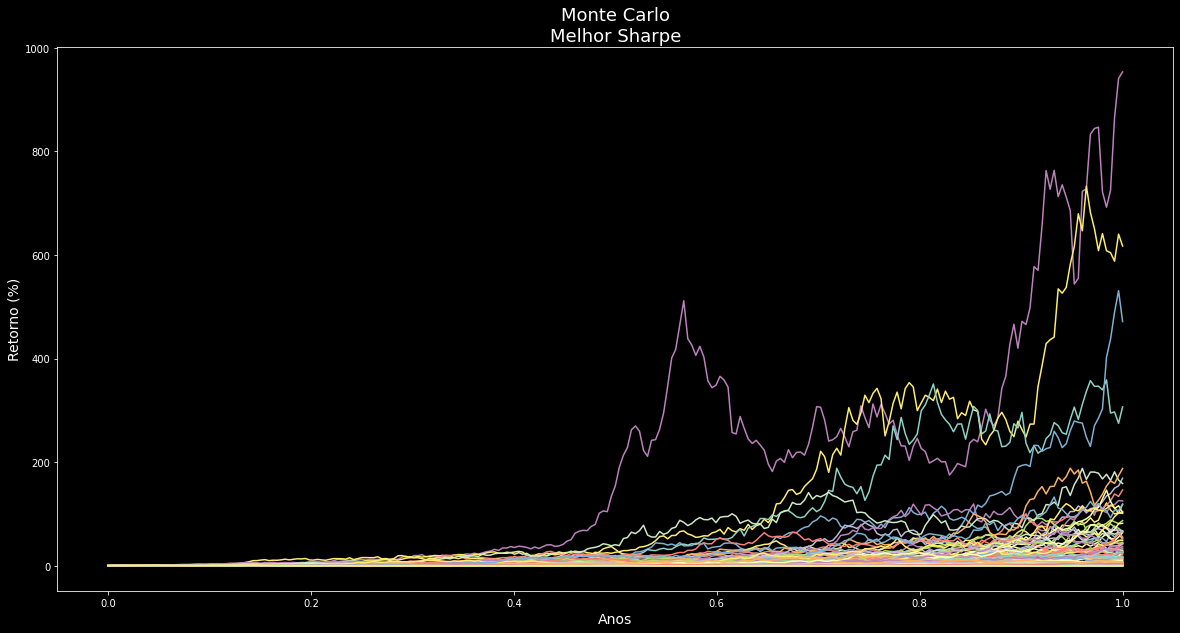

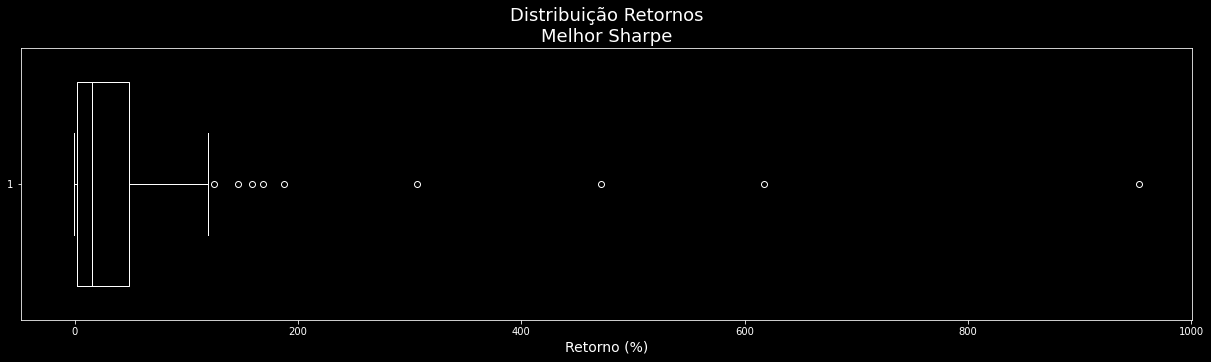

Agressivo
ITUB4.SA: 47693297%
RENT3.SA: -66550011%
B3SA3.SA: -22203568%
ABEV3.SA: -82747726%
JBSS3.SA: 68942043%
SUZB3.SA: -2291271%
NTCO3.SA: -23959097%
LREN3.SA: -23940818%
GGBR4.SA: -88830470%
HAPV3.SA: 75026312%
RAIL3.SA: -61156982%
EGIE3.SA: 15545620%
BRKM5.SA: 91475827%
MRFG3.SA: 83237426%
BRML3.SA: -10240482%
Drift: 1187900.3348739026
Volatility: 821959.4460104867
DescribeResult(nobs=100, minmax=(-1.0, -1.0), mean=-1.0, variance=0.0, skewness=0.0, kurtosis=-3.0)
Probabilidade de ter lucro: 0.00%
Probabilidade de atingir 15%: 0.00%


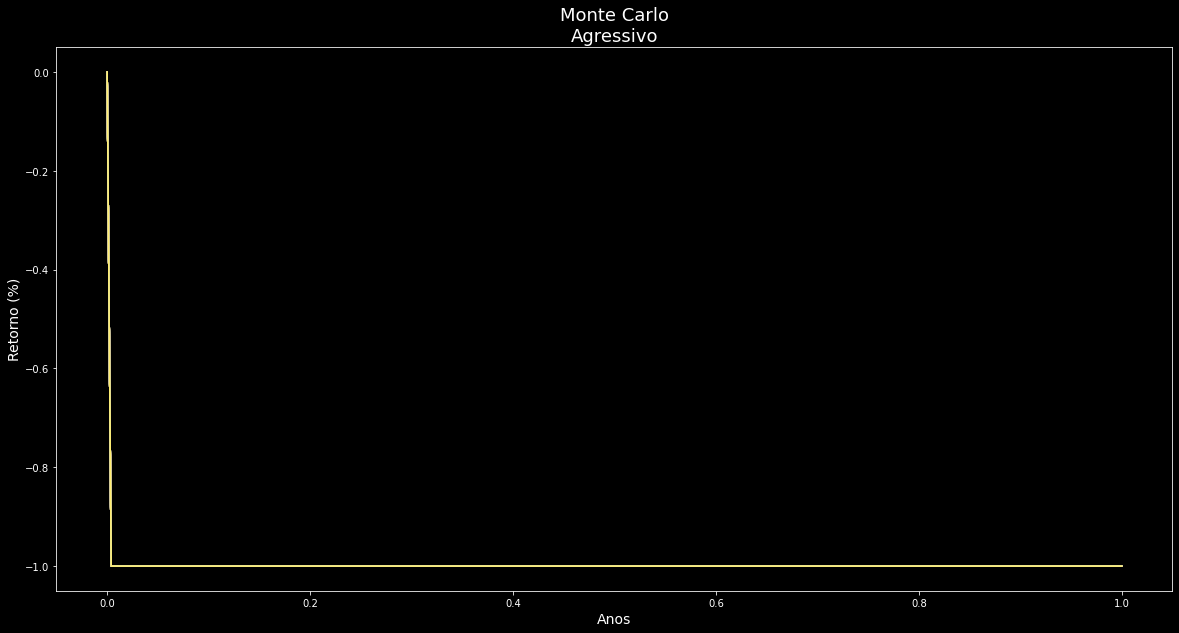

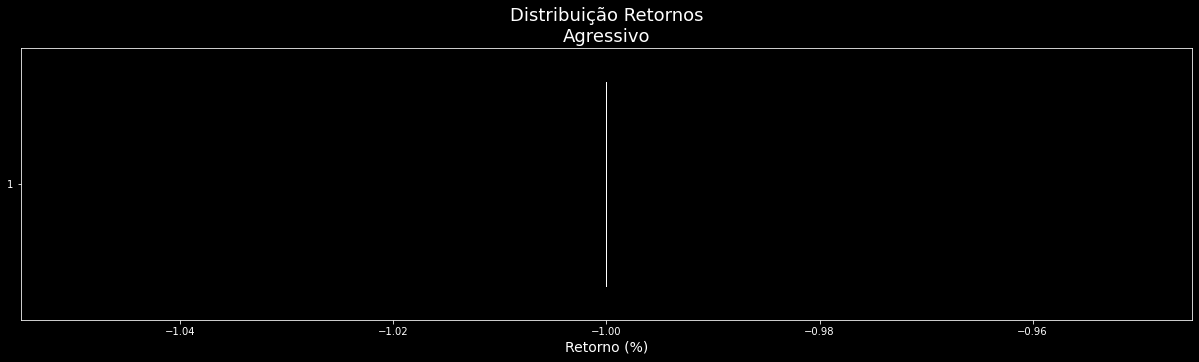

Conservador
ITUB4.SA: 11%
RENT3.SA: -8%
B3SA3.SA: 1%
ABEV3.SA: 14%
JBSS3.SA: 11%
SUZB3.SA: 20%
NTCO3.SA: 0%
LREN3.SA: -3%
GGBR4.SA: 15%
HAPV3.SA: 11%
RAIL3.SA: -2%
EGIE3.SA: 21%
BRKM5.SA: -6%
MRFG3.SA: 11%
BRML3.SA: 3%
Drift: 0.06386618830536496
Volatility: 0.16334370572152807
DescribeResult(nobs=100, minmax=(-0.24259825682300684, 0.7017884326191488), mean=0.07279615820959967, variance=0.03130602851768168, skewness=0.6948454311469685, kurtosis=0.7793702785298522)
Probabilidade de ter lucro: 63.00%
Probabilidade de atingir 15%: 0.00%


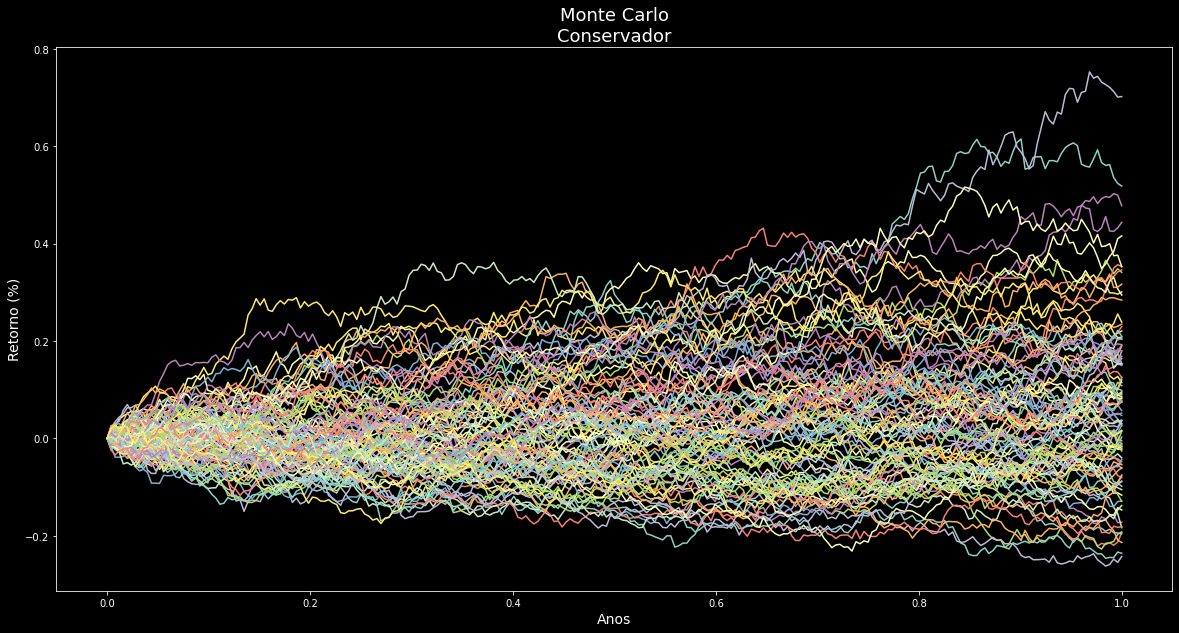

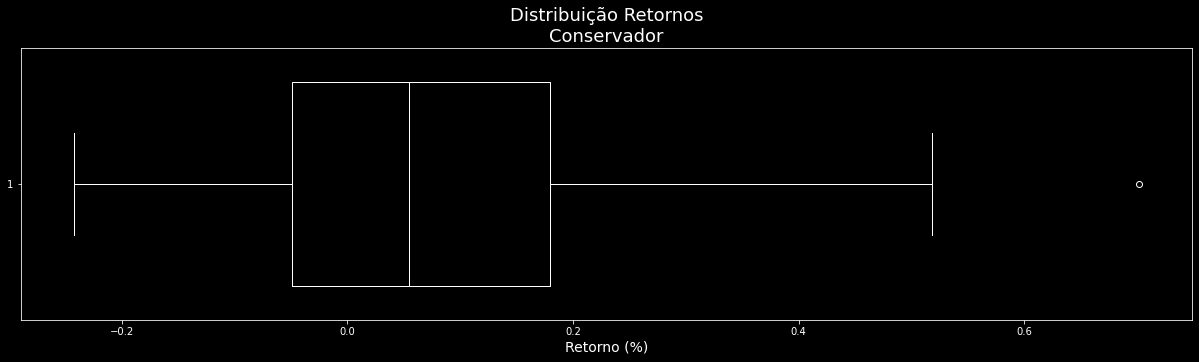

In [15]:
for i in params:
    # drift coefficent
    mu = i[2]
    # number of steps
    n = 252
    # time in years
    T = 1
    # number of sims
    M = 100
    # initial stock price
    S0 = 1
    # volatility
    sigma = i[3]
    
    # calc each time step
    dt = T/n

    # simulation using numpy arrays
    St = np.exp(
        (mu - sigma ** 2 / 2) * dt
        + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )

    # include array of 1's
    St = np.vstack([np.ones(M), St])

    # multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
    St = S0 * St.cumprod(axis=0) - 1
    # St = (St-1)*100
    
    # Define time interval correctly 
    time = np.linspace(0,T,n+1)

    # Require numpy array that is the same shape as St
    tt = np.full(shape=(M,n+1), fill_value=time).T
    
    print(i[0])
    for p, w in zip(tickers, i[1]):
        print(f'{p}: {w:.0%}')
    print(f'Drift: {mu}\nVolatility: {sigma}')
    print(stats.describe(St[-1]))
    print(f'Probabilidade de ter lucro: {np.array(St[-1] > 0).sum()/M:.2%}')
    print(f'Probabilidade de atingir {meta}%: {np.array(St[-1] > meta).sum()/M:.2%}')
    
    
    plt.figure(figsize=(20,10))
    plt.plot(tt, St)
    plt.xlabel("Anos", fontsize=14)
    plt.ylabel("Retorno (%)", fontsize=14)
    plt.title(f"Monte Carlo\n{i[0]}", fontsize=18)
    plt.show()
    
    plt.figure(figsize=(21,5))
    plt.boxplot(St[-1], vert=False, widths=0.75, boxprops={'color': 'white'}, whiskerprops={'color': 'white'}, flierprops={'markeredgecolor': 'white'}, medianprops={'color': 'white'}, capprops={'color': 'white'})

    plt.xlabel("Retorno (%)", fontsize=14)
    plt.title(f"Distribuição Retornos\n{i[0]}", fontsize=18)
    plt.show()

Drift: 3.9536815407255266
Volatility: 1.525467916370409


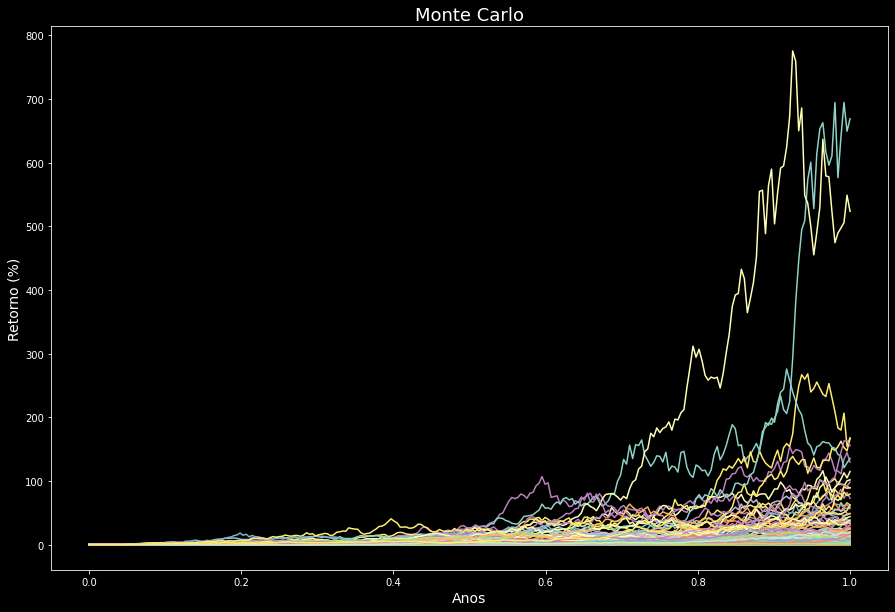

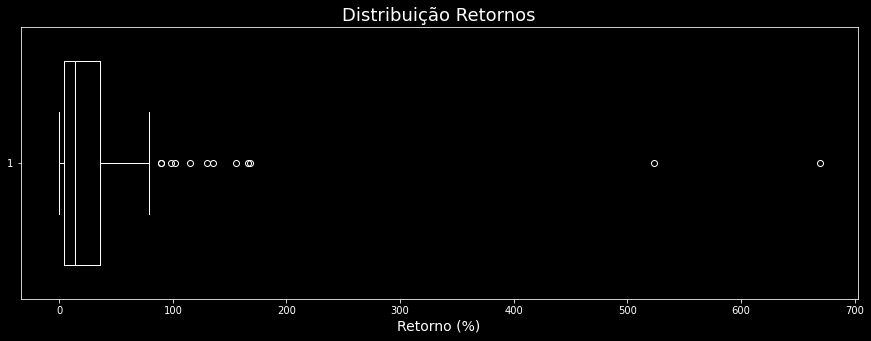

In [16]:
while True:
    # drift coefficent
    preset = input("Preset (Melhor Sharpe-> 'ms', Conservador-> 'c', Agressivo-> 'a', Personalizado-> 'p'):")
    if preset == 'quit':
        break
    if preset in ('ms', 'c', 'a'):
        presets = {'ms': -3, 'a': -2, 'c': -1}
        mu, sigma = params[presets[preset]][2], params[presets[preset]][3]
    else:
        mu = float(input('Drift: '))
        sigma =float(input('Volatility: '))

    print(f'Drift: {mu}\nVolatility: {sigma}')
    # number of steps
    n = 252
    # time in years
    T = 1
    # number of sims
    M = 100
    # initial stock price
    S0 = 1
    # volatility
    

    # calc each time step
    dt = T/n

    # simulation using numpy arrays
    St = np.exp(
        (mu - sigma ** 2 / 2) * dt
        + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )

    # include array of 1's
    St = np.vstack([np.ones(M), St])

    # multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
    St = S0 * St.cumprod(axis=0) - 1
    
    # Define time interval correctly 
    time = np.linspace(0,T,n+1)

    # Require numpy array that is the same shape as St
    tt = np.full(shape=(M,n+1), fill_value=time).T

    fig, ax = plt.subplots(figsize=(15,10))
    lines = plt.plot(tt, St)
    plt.xlabel("Anos", fontsize=14)
    plt.ylabel("Retorno (%)", fontsize=14)
    plt.title(f"Monte Carlo", fontsize=18)

    plt.figure(figsize=(15,5))
    plt.boxplot(St[-1], vert=False, widths=0.75, boxprops={'color': 'white'}, whiskerprops={'color': 'white'}, flierprops={'markeredgecolor': 'white'}, medianprops={'color': 'white'}, capprops={'color': 'white'})
    plt.xlabel("Retorno (%)", fontsize=14)
    plt.title(f"Distribuição Retornos", fontsize=18)

    plt.show()